In [1]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC

from sklearn import preprocessing
import pydotplus
import sklearn.tree as tree
import warnings
warnings.filterwarnings('ignore')

import pydotplus
from io import StringIO
from IPython.display import Image 

from sklearn import cross_validation
from sklearn.metrics import classification_report
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import cross_val_predict

from sklearn.metrics import accuracy_score

import os
from os import listdir
from os.path import isfile, join
from sklearn.externals import joblib

import sys

In [2]:
bank_sample = pd.read_csv("bank-sample.csv")

In [3]:
bank_sample.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,31,management,single,tertiary,no,0,yes,no,cellular,15,apr,185,2,-1,0,unknown,no
1,45,entrepreneur,married,tertiary,no,1752,yes,yes,cellular,20,nov,56,2,-1,0,unknown,no
2,46,services,divorced,secondary,no,4329,no,no,cellular,21,nov,534,2,-1,0,unknown,yes
3,35,management,married,tertiary,no,1108,yes,no,cellular,17,nov,52,1,-1,0,unknown,no
4,39,management,married,secondary,no,1410,yes,no,unknown,23,may,55,1,-1,0,unknown,no


In [4]:
le = preprocessing.LabelEncoder()

In [5]:
le.fit(bank_sample['poutcome'])

LabelEncoder()

In [6]:
le.classes_

array(['failure', 'other', 'success', 'unknown'], dtype=object)

In [7]:
bank_sample['poutcome'] = le.transform(bank_sample['poutcome'])

In [8]:
bank_sample.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,31,management,single,tertiary,no,0,yes,no,cellular,15,apr,185,2,-1,0,3,no
1,45,entrepreneur,married,tertiary,no,1752,yes,yes,cellular,20,nov,56,2,-1,0,3,no
2,46,services,divorced,secondary,no,4329,no,no,cellular,21,nov,534,2,-1,0,3,yes
3,35,management,married,tertiary,no,1108,yes,no,cellular,17,nov,52,1,-1,0,3,no
4,39,management,married,secondary,no,1410,yes,no,unknown,23,may,55,1,-1,0,3,no


In [9]:
str_labels = ['loan', 'contact', 'month', 'housing', 'default', 'education', 'marital', 
              'job', 'poutcome', 'subscribed']

def preprocess(bank_sample, str_labels):
    for label in str_labels:
        le.fit(bank_sample[label])
        bank_sample[label] = le.transform(bank_sample[label])
    return bank_sample


bank_sample = preprocess(bank_sample, str_labels)

In [10]:
bank_sample.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,31,4,2,2,0,0,1,0,0,15,0,185,2,-1,0,3,0
1,45,2,1,2,0,1752,1,1,0,20,9,56,2,-1,0,3,0
2,46,7,0,1,0,4329,0,0,0,21,9,534,2,-1,0,3,1
3,35,4,1,2,0,1108,1,0,0,17,9,52,1,-1,0,3,0
4,39,4,1,1,0,1410,1,0,2,23,8,55,1,-1,0,3,0


In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
X = bank_sample.ix[:,'age':'poutcome']

In [13]:
Y = bank_sample.ix[:,'subscribed':]

In [14]:
clf = DecisionTreeClassifier(random_state=0)
clf = clf.fit(X, Y)

In [15]:
un_seen = [35,2,1,2,0,752,1,1,0,20,9,56,2,-1,0,3]

In [16]:
clf.predict(un_seen)[0]

0

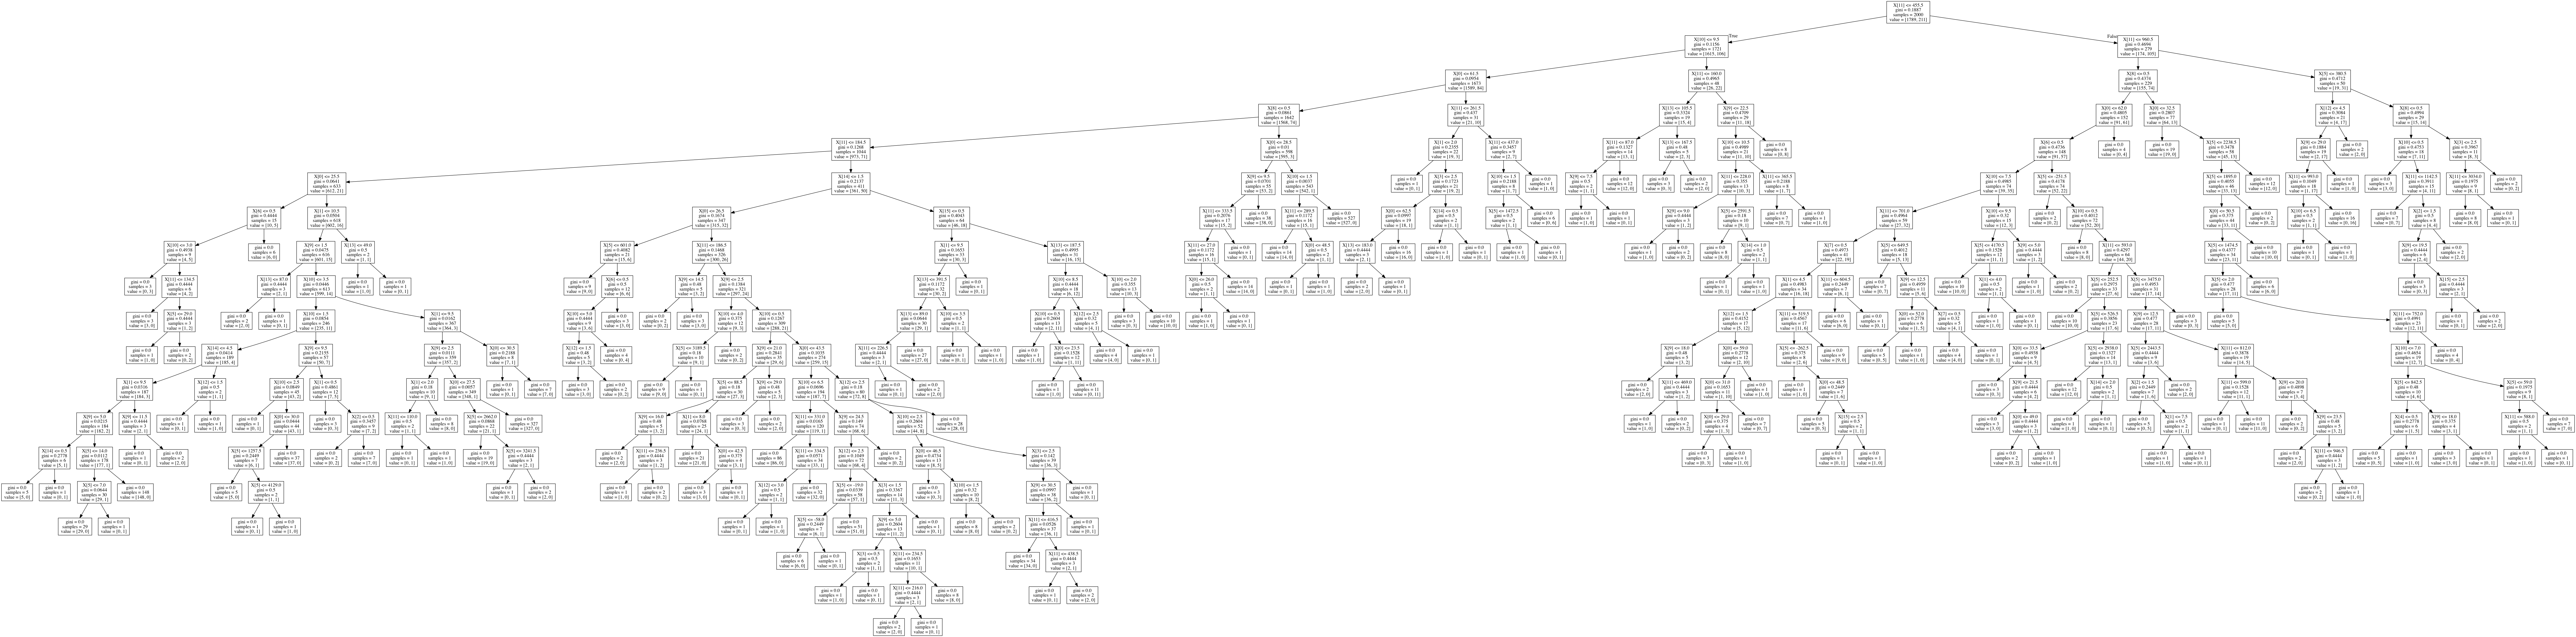

In [17]:
tree.export_graphviz(clf, out_file='tree.dot') 

dotfile = StringIO()
tree.export_graphviz(clf, out_file=dotfile)
pydotplus.graph_from_dot_data(dotfile.getvalue()).write_png("dtree2.png")
graph = pydotplus.graph_from_dot_data(dotfile.getvalue())
Image(graph.create_png())  

In [18]:
X_train, X_test,Y_train,Y_test = \
cross_validation.train_test_split(X,Y['subscribed'],test_size=0.10,random_state=43)

In [19]:
print ("precision: ", cross_val_score(clf, X_train, Y_train, cv=10, scoring='precision').mean())

precision:  0.341107682469


In [20]:
print ("recall: ", cross_val_score(clf, X_train, Y_train, cv=10, scoring='recall').mean())

recall:  0.386549707602


In [21]:
scores = cross_validation.cross_val_score(clf, X_test,Y_test, cv=10)
print("Accuracy: ", scores.mean())

Accuracy:  0.815802005013


In [22]:
scores

array([ 0.66666667,  0.85714286,  0.85      ,  0.85      ,  0.9       ,
        0.8       ,  0.75      ,  0.8       ,  0.78947368,  0.89473684])

In [23]:
# generate report
predicted = cross_val_predict(clf, X_test, Y_test, cv=10)
print(classification_report(Y_test, predicted))

             precision    recall  f1-score   support

          0       0.90      0.89      0.90       178
          1       0.17      0.18      0.18        22

avg / total       0.82      0.81      0.82       200



In [24]:
from sklearn import cross_validation
from sklearn.metrics import classification_report
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import cross_val_predict

from sklearn.metrics import accuracy_score

In [25]:
bank_sample_test = pd.read_csv("bank-sample-test.csv")

In [26]:
bank_sample_test = preprocess(bank_sample_test, str_labels)

In [27]:
X = bank_sample_test.ix[:,'age':'poutcome']
Y = bank_sample_test.ix[:,'subscribed':]['subscribed']

In [28]:
test_predictions = []

for row in X.values:
    test_predictions.append(clf.predict(row)[0])

In [29]:
print(classification_report(test_predictions, Y))

             precision    recall  f1-score   support

          0       0.96      0.93      0.94        91
          1       0.45      0.56      0.50         9

avg / total       0.91      0.90      0.90       100



In [30]:
accuracy_score(test_predictions, Y)

0.90000000000000002

In [31]:
bank_sample = pd.read_csv("bank-sample.csv")
bank_sample = preprocess(bank_sample, str_labels)
X = bank_sample.ix[:,'age':'poutcome']
Y = bank_sample.ix[:,'subscribed':]

X = list(X.values)
Y = Y['subscribed']

In [32]:
def learning (clf, X,Y):
    # train the model on all the data
    clf.fit(X, Y)
    
    # evaluatation using train_test_split
    X_train, X_test,Y_train,Y_test = \
        cross_validation.train_test_split(X,Y, test_size=0.20,random_state=43)

    model = clf.fit(X_train, Y_train)
    score_tt = model.score(X_test, Y_test)
    print (score_tt)
    
    # evaluatation using cross_validation
    predicted = cross_val_predict(clf, X, Y, cv=10)
    scores_cv = cross_val_score(clf, X, Y, cv=10)
    print (scores_cv)
    
    print("Accuracy: ", scores_cv.mean())
    print(classification_report(Y, predicted))

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC

In [34]:
clf = BernoulliNB()
learning (clf, X,Y)

0.905
[ 0.90049751  0.87        0.87        0.88        0.895       0.9         0.89
  0.875       0.885       0.89447236]
Accuracy:  0.885996987425
             precision    recall  f1-score   support

          0       0.91      0.97      0.94      1789
          1       0.40      0.17      0.24       211

avg / total       0.86      0.89      0.86      2000



In [35]:
clfs = [DecisionTreeClassifier,
        GaussianNB,
        BernoulliNB,
        LogisticRegression,
        SGDClassifier,
        SVC,
        LinearSVC]

In [36]:
for clf in clfs:
    print (str(clf).split('.')[-1][:-2], ":")
    learning (clf(), X,Y)
    print ()

DecisionTreeClassifier :
0.86
[ 0.83084577  0.88        0.85        0.875       0.855       0.885       0.865
  0.835       0.835       0.87939698]
Accuracy:  0.859024275607
             precision    recall  f1-score   support

          0       0.92      0.91      0.92      1789
          1       0.32      0.35      0.33       211

avg / total       0.86      0.85      0.85      2000


GaussianNB :
0.8675
[ 0.87562189  0.885       0.815       0.915       0.85        0.84        0.895
  0.865       0.88        0.85427136]
Accuracy:  0.867489324733
             precision    recall  f1-score   support

          0       0.93      0.92      0.93      1789
          1       0.39      0.45      0.42       211

avg / total       0.88      0.87      0.87      2000


BernoulliNB :
0.905
[ 0.90049751  0.87        0.87        0.88        0.895       0.9         0.89
  0.875       0.885       0.89447236]
Accuracy:  0.885996987425
             precision    recall  f1-score   support

          0  

In [37]:
import os
from os import listdir
from os.path import isfile, join
from sklearn.externals import joblib

In [38]:
def learning (clf, X,Y):

    clf.fit(X, Y)
    
    predicted = cross_val_predict(clf, X, Y, cv=10)
    scores = cross_val_score(clf, X, Y, cv=10)
    
    print("Accuracy: ", scores.mean())
    print(classification_report(Y, predicted))
    
    # Save the classifier
    directory = "classifiers"
    if not os.path.exists(directory):
        os.makedirs(directory)

    classifier_file_name = "classifiers/%0.2f_%s.pkl" % (scores.mean(), str(clf).split('(')[0])
    joblib.dump(clf, classifier_file_name, compress = 1)

In [39]:
for clf in clfs:
    print (str(clf).split('.')[-1][:-2], ":")
    learning (clf(), X,Y)
    print ()

DecisionTreeClassifier :
Accuracy:  0.853524150604
             precision    recall  f1-score   support

          0       0.92      0.91      0.92      1789
          1       0.31      0.35      0.33       211

avg / total       0.86      0.85      0.85      2000


GaussianNB :
Accuracy:  0.867489324733
             precision    recall  f1-score   support

          0       0.93      0.92      0.93      1789
          1       0.39      0.45      0.42       211

avg / total       0.88      0.87      0.87      2000


BernoulliNB :
Accuracy:  0.885996987425
             precision    recall  f1-score   support

          0       0.91      0.97      0.94      1789
          1       0.40      0.17      0.24       211

avg / total       0.86      0.89      0.86      2000


LogisticRegression :
Accuracy:  0.894996937423
             precision    recall  f1-score   support

          0       0.91      0.98      0.94      1789
          1       0.51      0.17      0.25       211

avg / total   

In [40]:
clf = SVC()
learning (clf, X,Y)

Accuracy:  0.894501962549
             precision    recall  f1-score   support

          0       0.89      1.00      0.94      1789
          1       0.00      0.00      0.00       211

avg / total       0.80      0.89      0.84      2000



In [41]:
# For Production Classification 
def classify (row):
    clf = joblib.load('classifiers/0.89_SVC.pkl')
    return clf.predict(row)[0]

In [42]:
bank_sample_test = pd.read_csv("bank-sample-test.csv")
bank_sample_test = preprocess(bank_sample_test, str_labels)
X = bank_sample_test.ix[:,'age':'poutcome']
Y = bank_sample_test.ix[:,'subscribed':]['subscribed']

test_predictions = []

for row in X.values:
    test_predictions.append(classify(row))

In [43]:
print(classification_report(test_predictions, Y))
accuracy_score(test_predictions, Y)

             precision    recall  f1-score   support

          0       1.00      0.89      0.94       100
          1       0.00      0.00      0.00         0

avg / total       1.00      0.89      0.94       100



0.89000000000000001